# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [1]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''


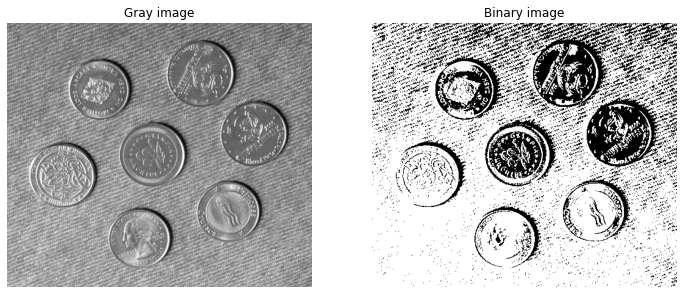

In [2]:
img = io.imread('img/coins.jpg', True)
binary_img = (img > 0.5).astype(np.byte)
titles = ['Gray image', 'Binary image'] 
show_images([img, binary_img], titles)

In [3]:
def erosion(img, dx, dy):
    n_img = []
    img = np.pad(img, (dx // 2, dy // 2), constant_values= 1)
    
    for i in range(0, img.shape[0] - dx + 1, 1):
        row = []
        
        for j in range(0, img.shape[1] - dy + 1, 1):
            row.append((img[i:i + dx, j: j + dy]).min())
            
        n_img.append(row)
    
    return np.array(n_img)

In [4]:
def dilation(img, dx, dy):
    n_img = []
    img = np.pad(img, (dx // 2, dy // 2), constant_values= 1)

    for i in range(0, img.shape[0] - dx + 1, 1):
        row = []
        
        for j in range(0, img.shape[1] - dy + 1, 1):
            row.append((img[i:i + dx, j: j + dy]).max())
            
        n_img.append(row)
    
    return np.array(n_img)

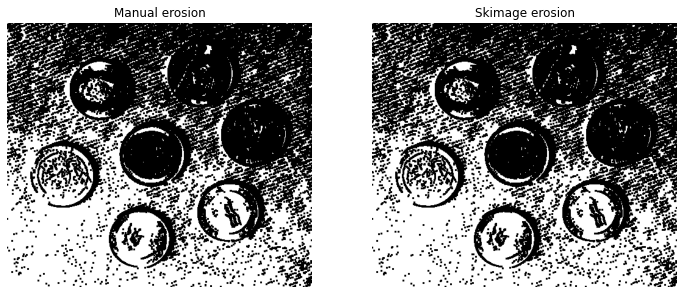

In [5]:
filt = np.ones((3, 3))
res1 = binary_erosion(binary_img, filt)
res2 = erosion(binary_img, 3, 3)
titles = ['Manual erosion', 'Skimage erosion']
show_images([res1, res2], titles)

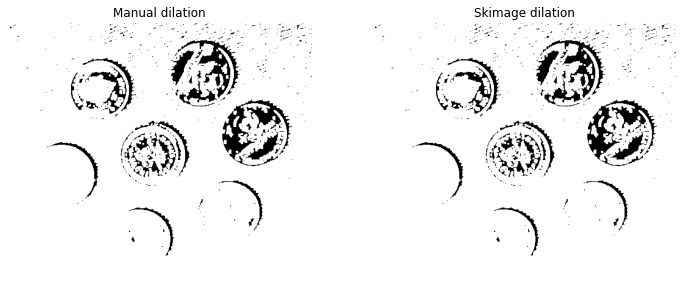

In [6]:
res1 = binary_dilation(binary_img, filt)
res2 = dilation(binary_img, 3, 3)
titles = ['Manual dilation', 'Skimage dilation']
show_images([res1, res2], titles)

In [ ]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''



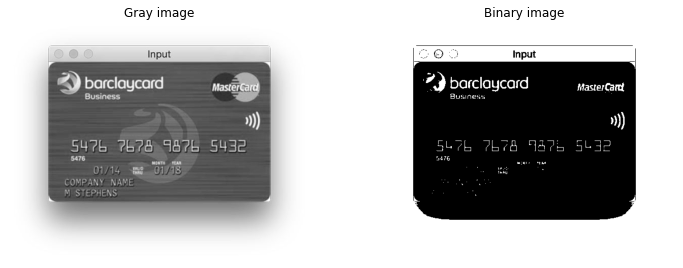

In [7]:
img = io.imread('img/card.jpg', True)
binary_img = (img > 0.75).astype(np.byte)

titles = ['Gray image', 'Binary image'] 
show_images([img, binary_img], titles)

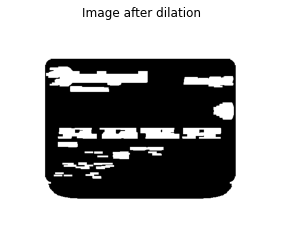

In [8]:
filt = np.ones((2, 5))
res = dilation(binary_img, 2, 8)
res = dilation(res, 2, 8)
res = dilation(res, 2, 5)


show_images([res], ['Image after dilation'])

In [9]:
contours = find_contours(res, 0.8)
len(contours)

27

In [10]:
bounding_boxes = []
for contour in contours:
    x_cordinates =  contour[:, 1]
    y_cordinates =  contour[:, 0]

    x_max = x_cordinates.max()
    x_min = x_cordinates.min()
    x_difference = x_max - x_min
    y_max = y_cordinates.max()
    y_min = y_cordinates.min()
    y_difference = y_max - y_min
    
  
    ratio = x_difference / y_difference
    if ratio > 3.51 and ratio <= 3.7:
        box = (x_min, x_max, y_min, y_max)
        bounding_boxes.append(box)

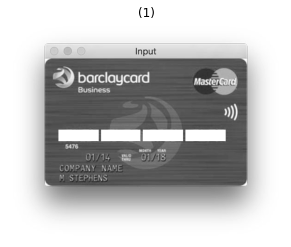

In [11]:
img_with_boxes = img.copy()

for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img.shape)
    img_with_boxes[rr.astype(int), cc.astype(int)] = 1 #set color white
    
show_images([img_with_boxes])

In [ ]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''


In [ ]:
horse_img = io.imread('img/horse.jpg', as_gray=True)
binary_horse_img = horse_img > 0.9 + 0.0
skelton_horse = skeletonize(binary_horse_img)
show_images([horse_img, binary_horse_img, skelton_horse])

In [ ]:
thin_horse_5 = thin(binary_horse_img, max_iter=5)
thin_horse_10 = thin(binary_horse_img, max_iter=10)
thin_horse_15 = thin(binary_horse_img, max_iter=15)
thin_horse_20 = thin(binary_horse_img, max_iter=20)
show_images([thin_horse_5, thin_horse_10, thin_horse_15, thin_horse_20])